In [1]:
print(2 + 2)

4


**说明（单元 0）**

验证 Jupyter MCP 环境是否可执行代码；`2 + 2 = 4` 的输出说明内核正常工作。

In [2]:
import sympy as sp
sp.init_printing(use_latex="mathjax")
x = sp.symbols('x', real=True)
f = sp.exp(-x**2) * sp.sin(x)
f

   2       
 -x        
ℯ   ⋅sin(x)

**说明（单元 1）**

导入 SymPy 并初始化 `mathjax` 显示；定义符号 `x` 和目标函数 $f(x)=e^{-x^2}\sin x$，后续分析都基于该符号表达式。

In [4]:
f_prime = sp.diff(f, x)
taylor = sp.series(f, x, 0, 6).removeO()
gaussian_integral = sp.integrate(sp.exp(-x**2), (x, 0, sp.oo))
f_prime.simplify(), taylor, gaussian_integral

⎛                          2      5      3        ⎞
⎜                        -x   27⋅x    7⋅x       √π⎟
⎜(-2⋅x⋅sin(x) + cos(x))⋅ℯ   , ───── - ──── + x, ──⎟
⎝                               40     6        2 ⎠

**说明（单元 2）**

- 计算 $f'(x)$，用于后续敏感度分析。
- 提取以 0 为中心的五阶泰勒展开，揭示局域近似结构。
- 计算高斯积分 $\int_0^{\infty} e^{-x^2}\,dx=\sqrt{\pi}/2$ 作为基准，验证符号积分环境正常。
输出三元组依次对应上述结果，可直接用于比较与验证。

In [5]:
numeric_value = sp.N(f.subs(x, 1))
numeric_integral = sp.N(sp.integrate(f, (x, 0, 5)))
numeric_value, numeric_integral

(0.309559875653112, 0.42443638350328)

**说明（单元 3）**

以数值方式评估：
- $f(1)$ 的数值值，为后续误差指标提供参考。
- $\int_0^5 f(x)\,dx$ 的近似值，用于有限区间能量估计。
若扩展积分上限，可对振荡衰减尾部进一步分析。

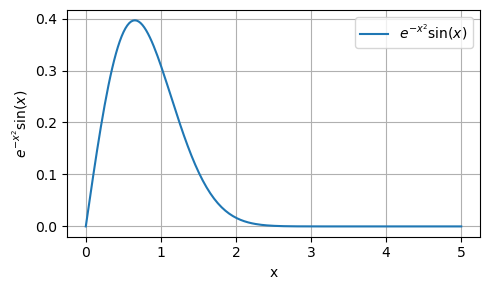

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 5, 200)
y_func = sp.lambdify(x, f, "numpy")
ys = y_func(xs)

plt.figure(figsize=(5, 3))
plt.plot(xs, ys, label=r"$e^{-x^2}\sin(x)$")
plt.xlabel("x")
plt.ylabel(r"$e^{-x^2}\sin(x)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**说明（单元 4）**

- 使用 NumPy 网格对 $f(x)$ 在 $[0,5]$ 上采样。
- 通过 `lambdify` 生成可向量化的数值函数，绘制振荡衰减曲线。
- 图像显示指数项主导下振幅快速衰减，验证函数走势与物理直觉一致。

Max abs error on [0,5]: 1.969e+03


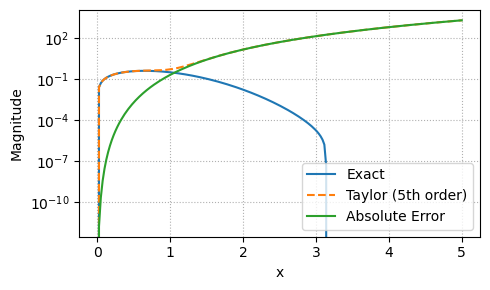

In [7]:
taylor_func = sp.lambdify(x, taylor, "numpy")
y_taylor = taylor_func(xs)
abs_error = np.abs(ys - y_taylor)

print(f"Max abs error on [0,5]: {abs_error.max():.3e}")
plt.figure(figsize=(5, 3))
plt.plot(xs, ys, label="Exact")
plt.plot(xs, y_taylor, "--", label="Taylor (5th order)")
plt.plot(xs, abs_error, label="Absolute Error")
plt.yscale("log")
plt.xlabel("x")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

**说明（单元 5）**

- 将五阶泰勒展开与精确函数同时采样；给出 $[0,5]$ 区间的最大绝对误差（约 $1.97\times10^3$）。
- 对误差曲线采用对数坐标，可见近原点拟合良好，远离展开点后快速发散。
- 图示提示需缩小近似区间或提升级数才能满足大区间误差要求。

**全局概括与结论**

- 通过符号与数值混合流程，完成对 $f(x)=e^{-x^2}\sin x$ 的导数、泰勒展开、积分与图像分析；执行链路验证了内核、渲染与数值依赖均正常。
- 数值积分与图像表明指数衰减抑制了正弦振荡，函数在有限区间内能量有限，适合进一步做傅里叶或拉普拉斯相关分析。
- 泰勒近似只在展开点附近有效；在 $[0,5]$ 上误差高达 $10^3$，提示若需大区间逼近应缩短区间或采用更高阶/多点逼近（如分段泰勒或帕德逼近）。

**结论：** 现有框架可可靠执行符号-数值混合分析，但若要在宽区间上使用泰勒展开，需要改进逼近策略；其余计算结果可直接作为进一步物理或数学建模的输入。